In [123]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
from datetime import date, timedelta

In [124]:
df_patient = pd.read_csv("//Users//maheshsai//Desktop//patient.csv")

In [125]:

df_patient= df_patient.drop('id',axis=1)
df_patient.head()

,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [127]:
len(df_patient)

5766

In [128]:
type(df_patient['birth_year'][0])

numpy.float64

In [129]:
df_patient['birth_year'] = df_patient.birth_year.fillna(0.0).astype(int)
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val: val if val > 0 else np.nan)

In [126]:
df_patient.isna().sum()

sex                 5345
birth_year          5358
country                1
region              5357
group               5683
infection_reason    5620
infection_order     5731
infected_by         5696
contact_number      5716
confirmed_date         1
released_date       5728
deceased_date       5743
state                  1
dtype: int64

In [130]:
df_patient['age'] = 2020 - df_patient['birth_year']

In [131]:
import math

In [132]:
def create_group(age):
    if((math.isnan(age))==False):
        
        if(age%10!=0):
            l = int(math.floor(age / 10.0)) * 10
            u = int(math.ceil(age / 10.0)) * 10 - 1
            return f"{l}-{u}"
        else:
            l = int(age)
            u = int(age + 9) 
            return f"{l}-{u}"
        return "na"


df_patient["range_for_age"] = df_patient["age"].apply(create_group)

In [133]:
df_patient.head()

,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age,range_for_age
0,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,36.0,30-39
1,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0,50-59
2,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0,50-59
3,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,56.0,50-59
4,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released,33.0,30-39


In [134]:
df_patient.isna().sum()

sex                 5345
birth_year          5358
country                1
region              5357
group               5683
infection_reason    5620
infection_order     5731
infected_by         5696
contact_number      5716
confirmed_date         1
released_date       5728
deceased_date       5743
state                  1
age                 5358
range_for_age       5358
dtype: int64

In [135]:
date_cols = ["confirmed_date", "released_date", "deceased_date"]
for col in date_cols:
    df_patient[col] = pd.to_datetime(df_patient[col])

In [136]:
df_patient['recovery_time']=df_patient["released_date"] - df_patient["confirmed_date"]

In [137]:
df_patient['time_for_death']= df_patient["deceased_date"] - df_patient["confirmed_date"]

In [138]:
df_patient['time_for_result'] = df_patient[["recovery_time", "time_for_death"]].min(axis=1)

In [139]:
df_patient['days_for_result']=df_patient['time_for_result'].dt.days

In [140]:
df_patient['recovery_time'].dt.days.max()

32.0

In [141]:
df_patient['recovery_time'].dt.days.min()

1.0

In [142]:
df_patient['time_for_death'].dt.days.max()

8.0

In [143]:
tested_positive = df_patient.shape[0]
released = df_patient.loc[df_patient["state"] == "released"].shape[0]
died = df_patient.loc[df_patient["state"] == "deceased"].shape[0]
isolated = df_patient.loc[df_patient["state"]== "isolated"].shape[0]
released=released/df_patient.shape[0]
died=died/df_patient.shape[0]
isolated=isolated/df_patient.shape[0]
print("The percentage of people recovered from corona is "+ str(released*100))
print("The percentage of people died from corona is "+ str(died*100))
print("The percentage of people isolated from corona is "+ str(isolated*100))

The percentage of people recovered from corona is 0.693721817551162
The percentage of people died from corona is 0.39889004509191817
The percentage of people isolated from corona is 98.89004509191814


In [144]:
labels = ['recovery', 'died', 'isolated']
sizes = [0.693721817551162,0.39889004509191817,98.89004509191814]

In [166]:
states = pd.DataFrame(df_patient["state"].value_counts())
states["status"] = states.index
states.rename(columns={"state": "count"}, inplace=True)
#sns.set(style="darkgrid")


fig = px.pie(states,
             values="count",
             names="status",
             title="Current state of patients",
             template="seaborn")
fig.update_traces(rotation=60, pull=0.05, textinfo="value+percent+label")
fig.show()

In [148]:
isolated_state = df_patient[df_patient.state == 'isolated']

In [149]:
isolated_df = pd.DataFrame(isolated_state["range_for_age"].value_counts().reset_index())
isolated_df

,index,range_for_age
0,20-29,75
1,50-59,62
2,30-39,62
3,60-69,55
4,40-49,54
5,70-79,20
6,10-19,8
7,80-89,6
8,0-9,3


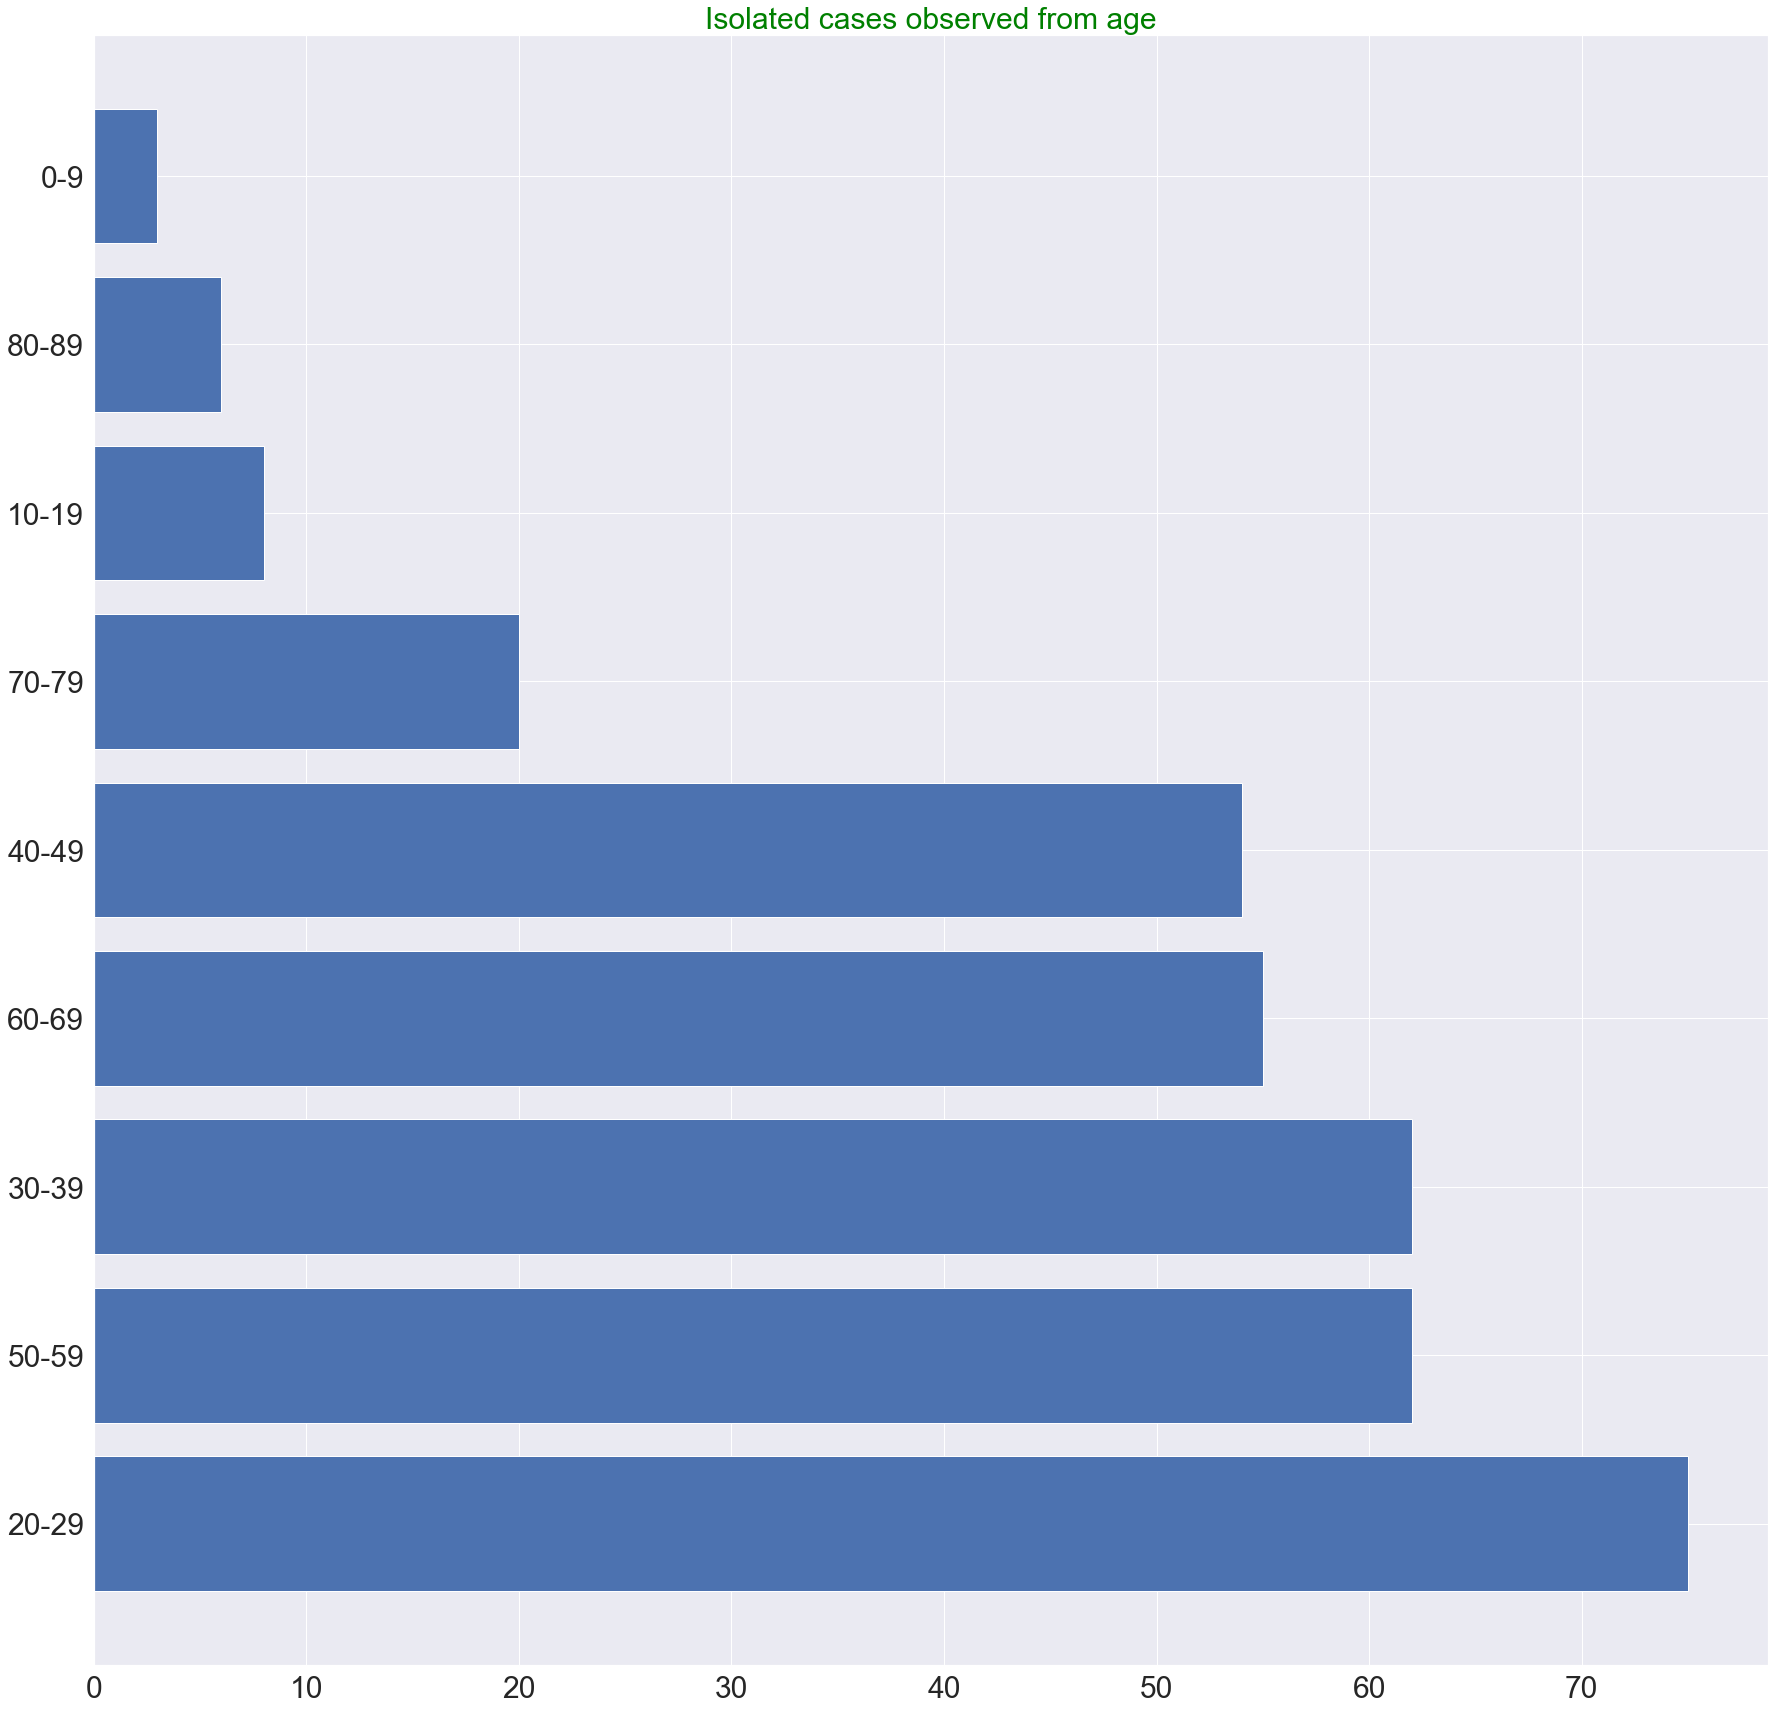

In [150]:
plt.figure(figsize=(30, 30))
plt.barh(isolated_df['index'],isolated_df['range_for_age'] )
plt.title('Isolated cases observed from age',size=30,color='green')
plt.xticks(size=30)
plt.yticks(size=30)
plt.show()

In [151]:
male_isolated = isolated_state[isolated_state.sex=='male']
female_isolated = isolated_state[isolated_state.sex=='female']


In [152]:
male_isolateds_df = pd.DataFrame(male_isolated["range_for_age"].value_counts().reset_index())
female_isolateds_df = pd.DataFrame(female_isolated["range_for_age"].value_counts().reset_index())

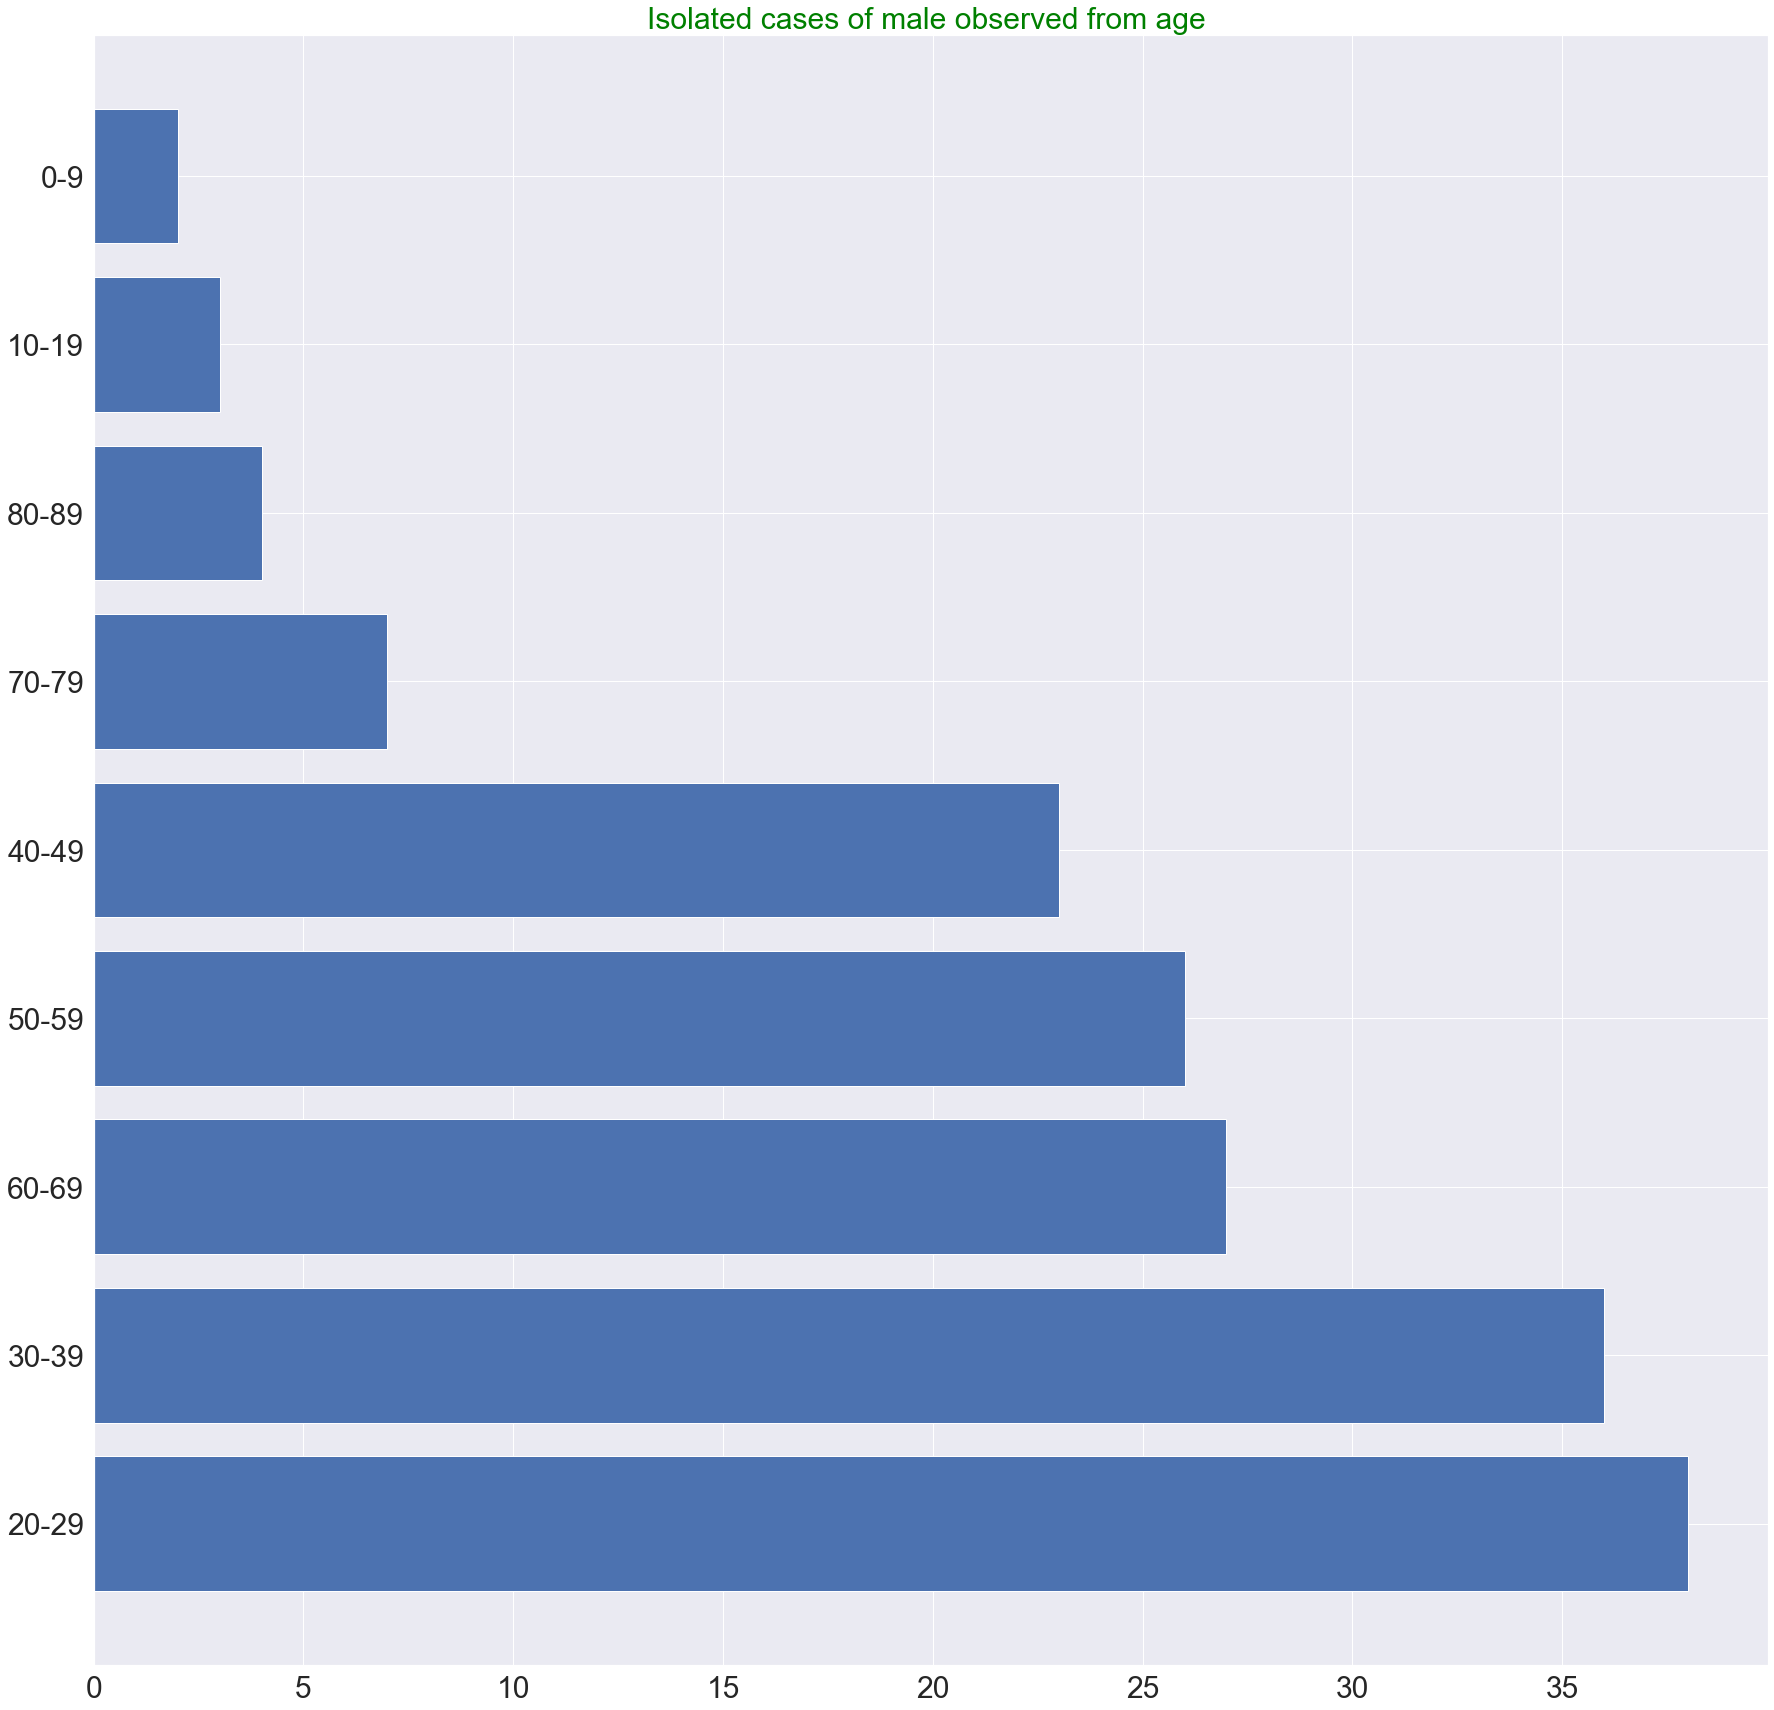

In [153]:
plt.figure(figsize=(30, 30))
plt.barh(male_isolateds_df['index'],male_isolateds_df['range_for_age'] )
plt.title('Isolated cases of male observed from age ',size=30,color='green')
plt.xticks(size=30)
plt.yticks(size=30)
plt.show()

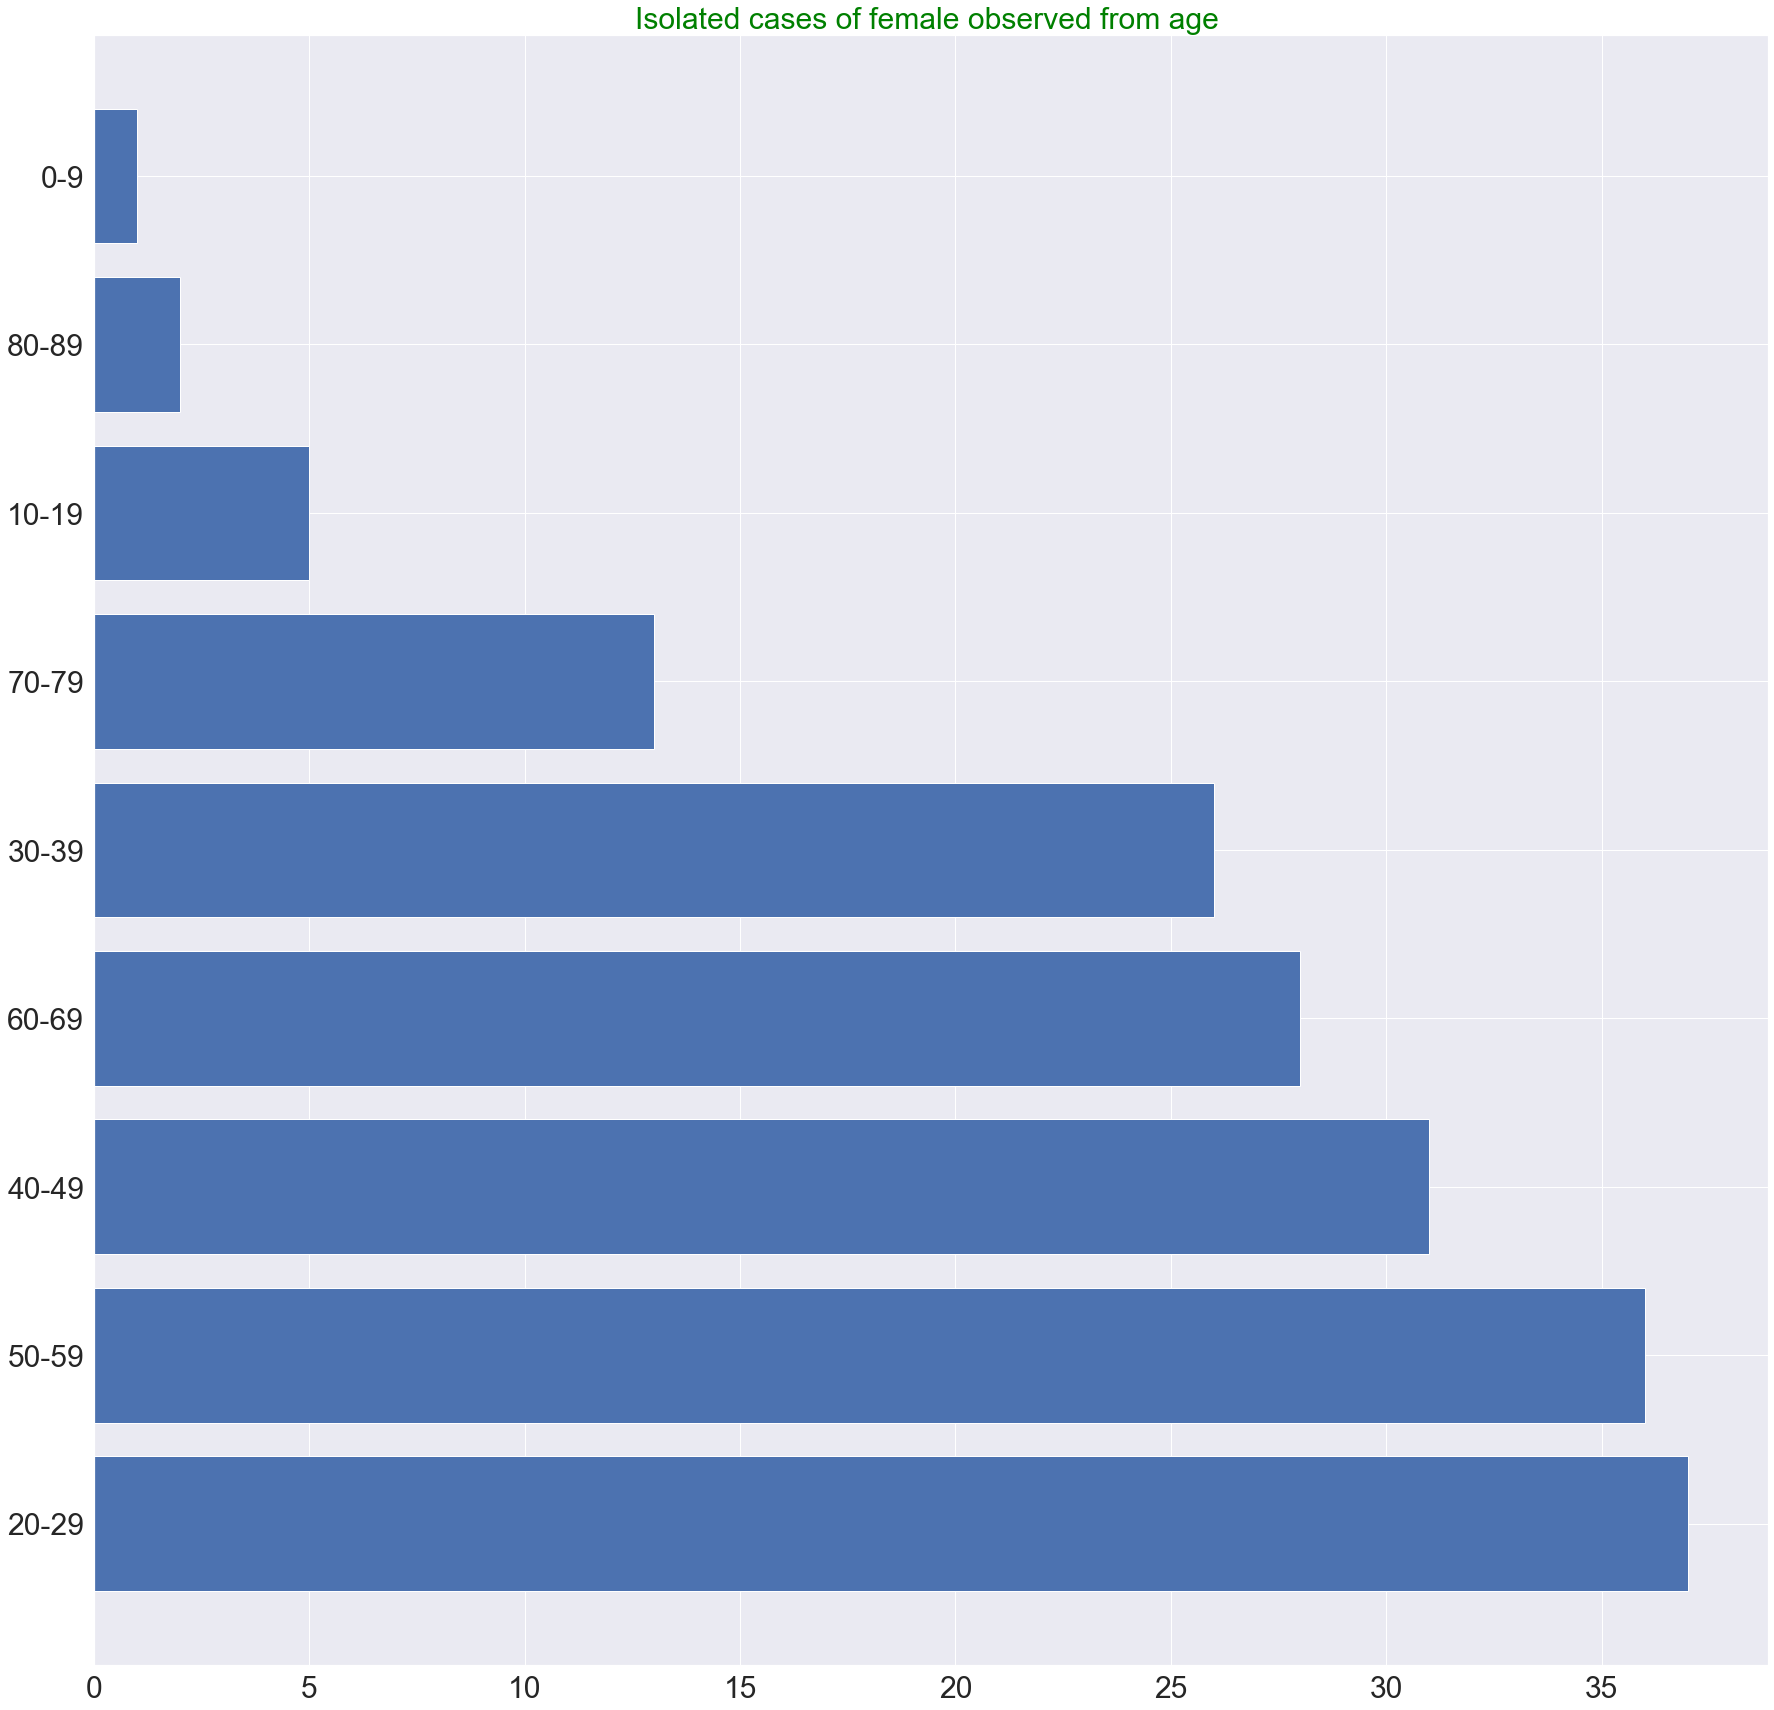

In [154]:
plt.figure(figsize=(30, 30))
plt.barh(female_isolateds_df['index'],female_isolateds_df['range_for_age'] )
plt.title('Isolated cases of female observed from age ',size=30,color='green')
plt.xticks(size=30)
plt.yticks(size=30)
plt.show()

In [155]:
dead = df_patient[df_patient.state == 'deceased']

In [156]:
deads_df = pd.DataFrame(dead["range_for_age"].value_counts().reset_index())

In [157]:
deads_df

,index,range_for_age
0,70-79,6
1,60-69,6
2,50-59,6
3,80-89,3
4,30-39,1
5,40-49,1


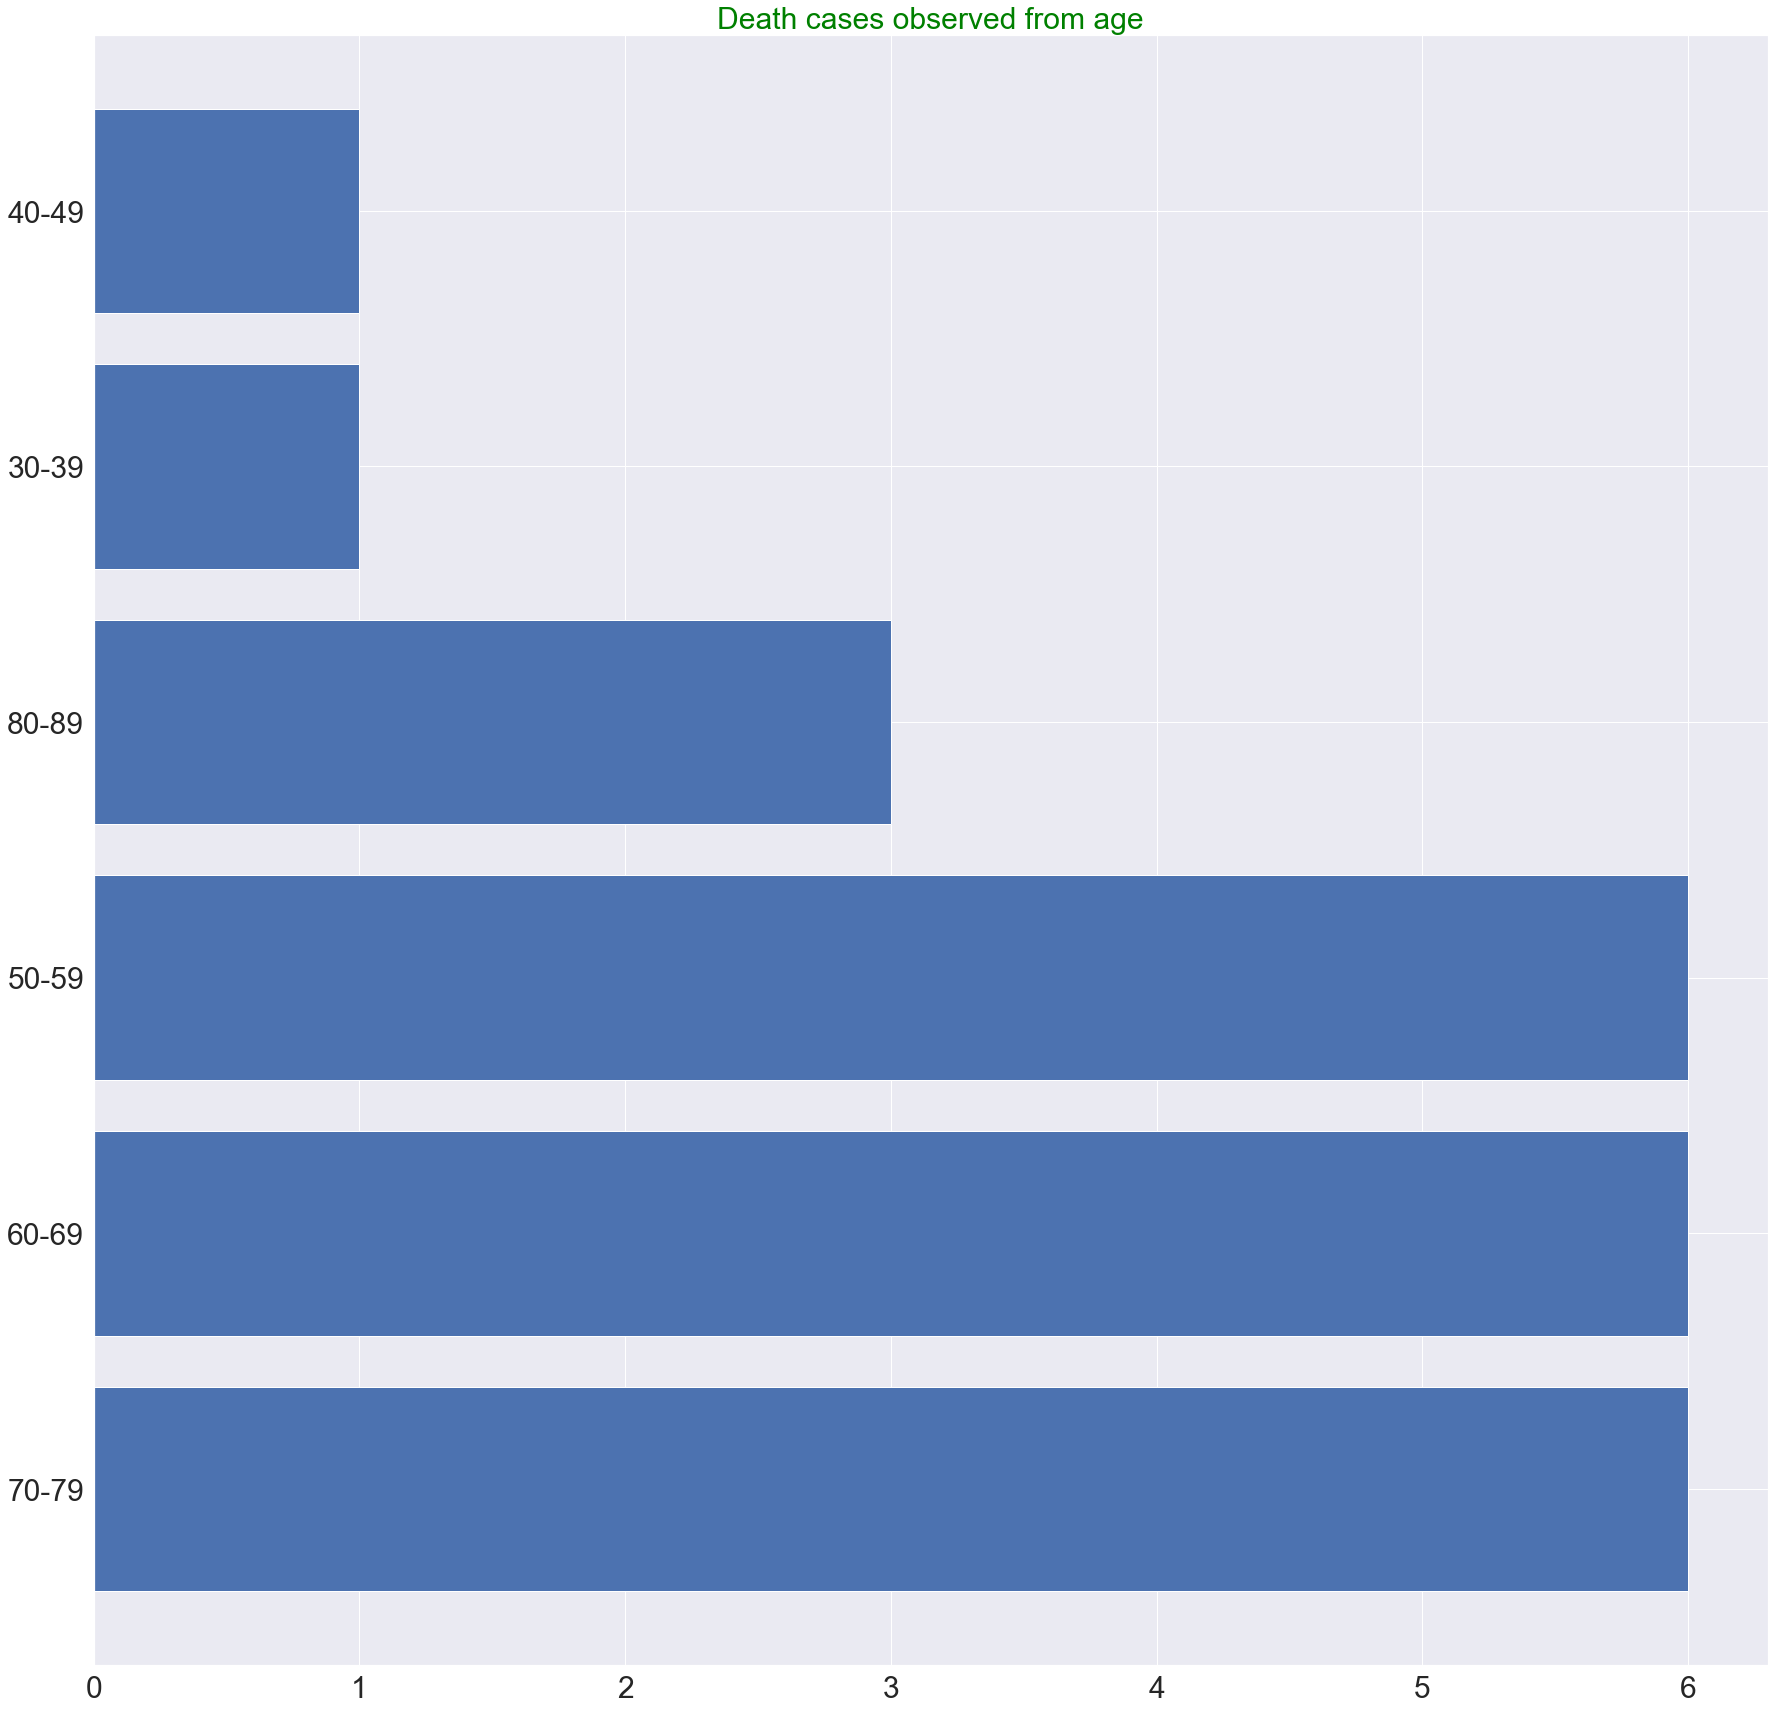

In [158]:
plt.figure(figsize=(30, 30))
plt.barh(deads_df['index'],deads_df['range_for_age'] )
plt.title('Death cases observed from age',size=30,color='green')
plt.xticks(size=30)
plt.yticks(size=30)
plt.show()

In [159]:
male_dead = dead[dead.sex=='male']
female_dead = dead[dead.sex=='female']

In [160]:
male_deads_df = pd.DataFrame(male_dead["range_for_age"].value_counts().reset_index())

In [161]:
female_deads_df = pd.DataFrame(female_dead["range_for_age"].value_counts().reset_index())

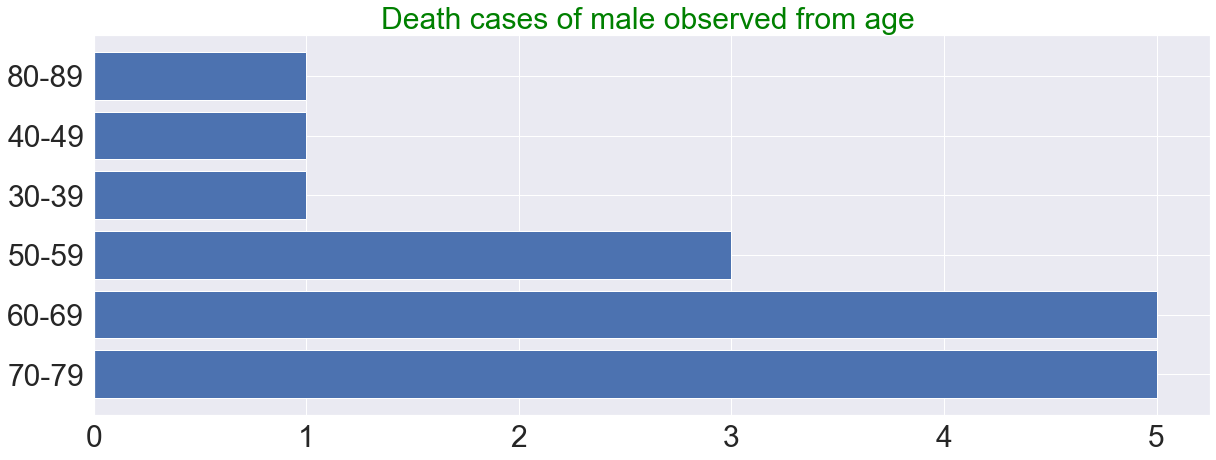

In [162]:
plt.figure(figsize=(20, 7))
plt.barh(male_deads_df['index'],male_deads_df['range_for_age'] )
plt.title('Death cases of male observed from age ',size=30,color='green')
plt.xticks(size=30)
plt.yticks(size=30)
plt.show()

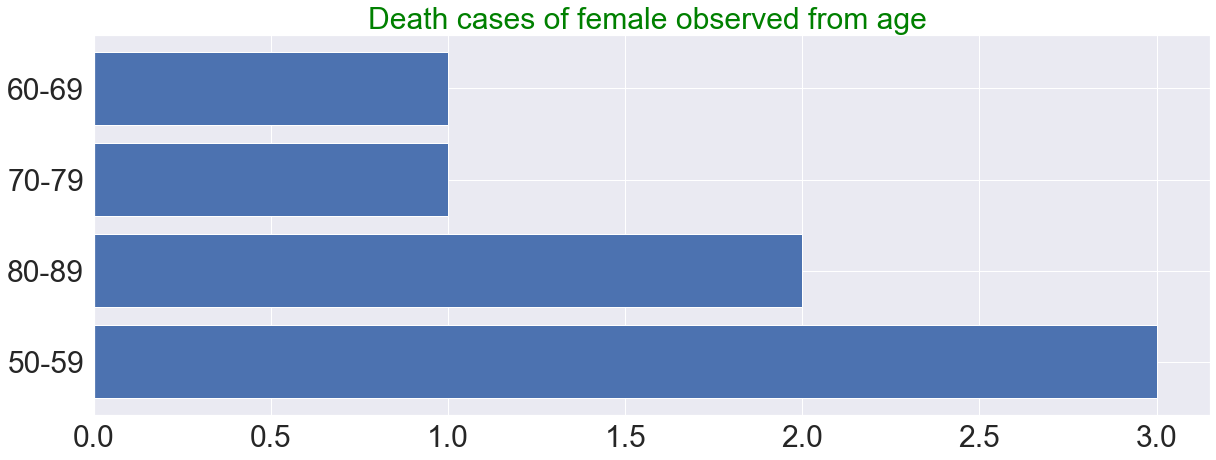

In [163]:
plt.figure(figsize=(20, 7))
plt.barh(female_deads_df['index'],female_deads_df['range_for_age'] )
plt.title('Death cases of female observed from age ',size=30,color='green')
plt.xticks(size=30)
plt.yticks(size=30)
plt.show()

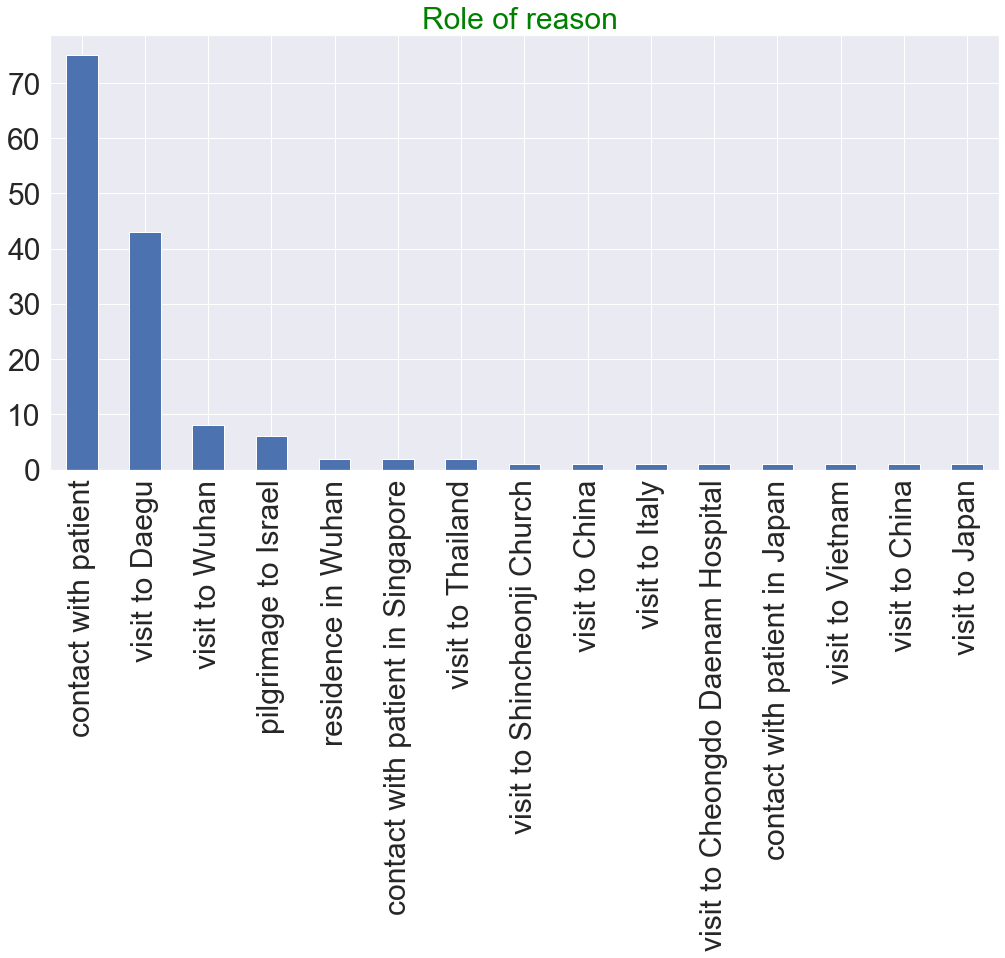

In [164]:
plt.figure(figsize=(17,8))
plt.title('Role of reason ',size=30,color='green')
plt.xticks(size=30)
plt.yticks(size=30)
df_patient.infection_reason.value_counts().plot.bar();

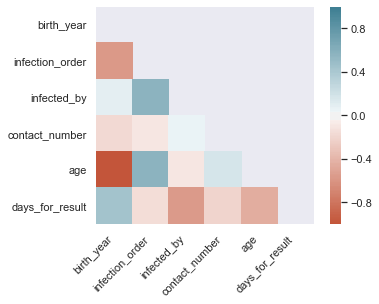

In [165]:
df=df_patient[['sex','birth_year','infection_reason']]
corr=df_patient.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
#sns.set(style="darkgrid")
ax = sns.heatmap(
    corr, 
    mask=mask,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);